# projet traitement d'images : Classification des chiffres manuscrit avec le SVM

In [4]:
from keras.datasets import mnist
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape)
x_train = x_train.reshape(48000,28*28)
x_test = x_test.reshape(12000,28*28)

clf = svm.SVC(kernel='poly',gamma='scale',coef0=0.48)

11490434/11490434 [==============================] - 5s 0us/step
(48000, 28, 28)


Ce code importe diverses bibliothèques et chargement de données à partir de la base de données MNIST de chiffres manuscrits. Il utilise également la fonction train_test_split de scikit-learn pour diviser les données d'entraînement et de test en utilisant un ratio de test de 0,2. Ensuite, il réforme les données d'entraînement et de test en tableaux à deux dimensions de 28x28 avant de créer un classifieur de vecteur de support (SVM) en utilisant un noyau polynomial avec des paramètres de gamma et coef0 spécifiés.


In [2]:
clf.fit(x_train, y_train)
yt_pred = clf.predict(x_test)
joblib.dump(clf, 'svm_model.pkl')

le classifieur SVM créé précédemment pour s'entraîner sur les données d'entraînement en utilisant la fonction fit. Ensuite, il utilise le classifieur entraîné pour prédire les étiquettes de test en utilisant la fonction predict sur les données de test. Enfin, le classifieur entraîné est enregistré dans un fichier svm_model.pkl en utilisant la fonction dump de la bibliothèque joblib.

In [17]:
import joblib
clf = joblib.load('svm_model.pkl')
yt_pred = clf.predict(x_test)

la bibliothèque joblib et charge le classifieur SVM entraîné précédemment à partir du fichier svm_model.pkl en utilisant la fonction load. Ensuite, il utilise le classifieur chargé pour prédire les étiquettes de test en utilisant la fonction predict sur les données de test. Ces étiquettes prédites sont stockées dans la variable yt_pred.

In [25]:
print(metrics.accuracy_score(y_test, yt_pred)*100,"%")

99.35000000000001 %


 la fonction accuracy_score de la bibliothèque metrics de scikit-learn pour calculer la précision du classifieur en comparant les étiquettes réelles de test (stockées dans la variable y_test) aux étiquettes prédites (stockées dans la variable yt_pred). La précision est imprimée en pourcentage en multipliant le résultat par 100.

la prediction de cette image est:  2


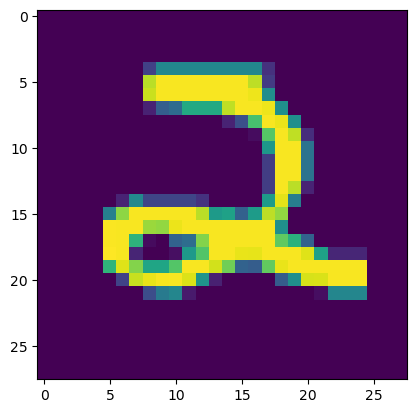

In [27]:
index=2899

x_test=x_test.reshape(12000,28,28)
img=plt.imshow(x_test[index])
print("la prediction de cette image est: ",yt_pred[index])

Ce code commence par définir la variable index comme étant égale à 17. Il réforme ensuite les données de test en tableaux à trois dimensions de 28x28 avant de créer une image en utilisant la fonction imshow de la bibliothèque matplotlib.pyplot et en lui passant la donnée de test à l'index 17 (stockée dans la variable x_test). Enfin, le code imprime la prédiction du classifieur pour cette donnée de test en utilisant l'index 17 de la liste des étiquettes prédites (stockées dans la variable yt_pred).

In [20]:
print("Cette image en array:")
print(x_test[index])


Cette image en array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  47 100 145 159 159 

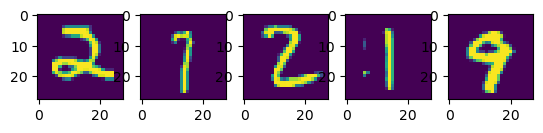

les Predictions de ces images sont: [2 7 2 1 9]


In [28]:

fig, axs = plt.subplots(1, 5)
axs[0].imshow(x_test[index])
axs[1].imshow(x_test[index+1])
axs[2].imshow(x_test[index+2])
axs[3].imshow(x_test[index+3])
axs[4].imshow(x_test[index+4])


plt.show()

a=yt_pred[index:index+5]
print("les Predictions de ces images sont:",a)

Ce code utilise la fonction subplots de la bibliothèque matplotlib.pyplot pour créer un sous-graphique composé de 5 sous-graphiques. Il affiche ensuite cinq images de données de test en utilisant la fonction imshow sur chaque sous-graphique, en utilisant les index de index à index+4 de la liste des données de test (stockées dans la variable x_test). La fonction show est ensuite utilisée pour afficher le sous-graphique. Enfin, le code imprime les prédictions du classifieur pour ces cinq données de test en utilisant les index de index à index+4 de la liste des étiquettes prédites (stockées dans la variable yt_pred).

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yt_pred)


print(cm)

[[1177    0    0    0    0    2    2    0    0    0]
 [   0 1417    1    0    1    0    0    1    0    1]
 [   2    0 1197    0    1    0    0    2    0    1]
 [   0    1    4 1278    0    3    0    0    3    1]
 [   1    0    0    0 1121    0    0    1    0    2]
 [   1    1    0    3    0 1103    1    0    0    0]
 [   0    0    0    0    1    1 1150    0    1    0]
 [   0    9    3    0    0    0    0 1211    0    4]
 [   0    3    0    1    1    3    2    1 1133    1]
 [   0    1    0    0    1    1    0    7    1 1135]]


Ce code utilise la fonction confusion_matrix du module metrics de scikit-learn pour générer une matrice de confusion. Une matrice de confusion est une table utilisée pour décrire les performances d'un modèle de classification sur un jeu de données de test pour lequel les vraies valeurs sont connues.

In [42]:
import pandas as pd

# Creation de dataframe pour la matrice de confusion
df = pd.DataFrame(cm, index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


print(df)


      0     1     2     3     4     5     6     7     8     9
0  1165     0     0     0     1     0     2     1     1     0
1     0  1341     2     1     1     0     0     0     0     0
2     1     0  1215     0     0     0     0     2     1     1
3     0     0     1  1238     1     2     0     2     2     1
4     0     0     0     0  1145     0     0     0     0     3
5     0     0     0     2     0  1066     1     1     0     2
6     1     0     0     0     2     1  1145     0     0     0
7     1     7     3     0     2     1     0  1280     0     5
8     0     3     0     0     0     3     0     1  1155     0
9     0     0     0     0     4     1     0     1     0  1182
